In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/LeeKwangWon/Desktop/Data/test.csv",encoding = "cp949", low_memory = False)
plt.rcParams['font.family'] = "Malgun Gothic"

In [8]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

In [12]:
#서울특별시 & 약국
df_seoul_drug = df[(df["시도명"] == "서울특별시") & (df["상권업종소분류명"] == "약국")]
df_seoul_drug.shape

(3583, 39)

In [16]:
c = df_seoul_drug["시군구명"].value_counts().head()
c

강남구     374
동대문구    262
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [17]:
#normalize.
n = df_seoul_drug["시군구명"].value_counts(normalize = True).head()
n

강남구     0.104382
동대문구    0.073123
광진구     0.059168
서초구     0.053307
송파구     0.052470
Name: 시군구명, dtype: float64

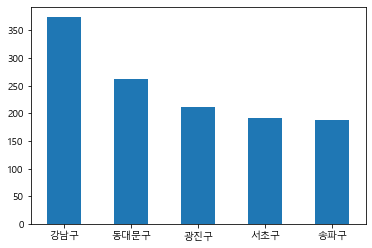

In [21]:
# 위에서 구한 결과를 판다스의 plot.bar
c.plot.bar(rot = 0)

In [28]:
## 서울특별시 종합병원
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital.shape

(93, 39)

In [30]:
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
서대문구     5
중구       5
강동구      5
송파구      5
도봉구      4
양천구      4
강북구      4
성북구      3
강서구      2
관악구      2
중랑구      2
동대문구     2
노원구      2
종로구      2
마포구      2
구로구      2
성동구      2
금천구      2
용산구      1
은평구      1
동작구      1
Name: 시군구명, dtype: int64

# 텍스트 데이터 색인하기.

In [36]:
# 종합병원이 아닌 데이터를 찾아봅시다.
# ~표시는 not을 의미한다. 종합병원이 들어가지 않은 것을 의미한다.
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '서울보훈병원',
       '서울성모병원장례식장꽃배달', '백산의료재단친구병원', '알콜중독및정신질환상담소', '서울대학교병원',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '창동제일의원', '신촌연세병원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '명곡안연구소', '아산재단금강병원', '아산재단서울중앙병원',
       '메디힐특수여객', '성광의료재단차병원', '성베드로병원', '삼성생명공익재단삼성서', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', 'Y&T성모마취과', '성애의료재단', '실로암의원', '광진성모의원', '서울현대의원',
       '이노신경과의원', '서울중앙의원', '송정훼밀리의원', '사랑의병원', '한국필의료재단', '서울연세의원',
       '영남의료재단', '세브란스의원', '송파제일의원', '원진재단부설녹색병원', '가톨릭대학교성바오로병원장례식장',
       '우이한솔의원', '인제대학교서울백병원', '한양성심의원', '강남센트럴병원', '관악성모의원',
       '성삼의료재단미즈메디병원', '

In [52]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다. - 꽃배달.
drop_row = df_seoul_hospital[
    df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

drop_row = drop_row.tolist()
drop_row

[8652, 17037, 19070, 20120, 51151, 72774, 311187, 337032, 366919]

In [60]:
#의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾자.
drop_row2  = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()


In [66]:
#삭제할 행을 drop_row에 합쳐줍니다.
drop_row = drop_row + drop_row2
len(set(drop_row))

33

In [65]:
#해당 셀을 삭제하고 삭제 전과 삭제후의 행의 개수를 비교합니다.
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row,axis = 0)
print(df_seoul_hospital.shape)

(93, 39)
(60, 39)


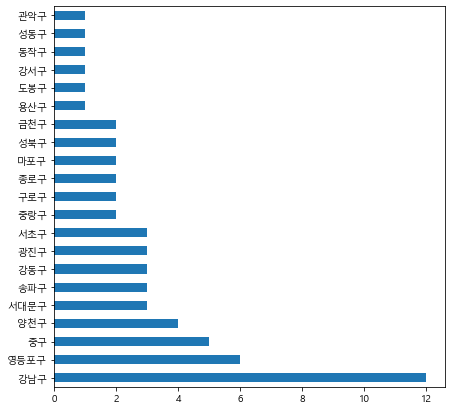

In [73]:
df_seoul_hospital["시군구명"].value_counts().plot.barh(figsize = (7,7))

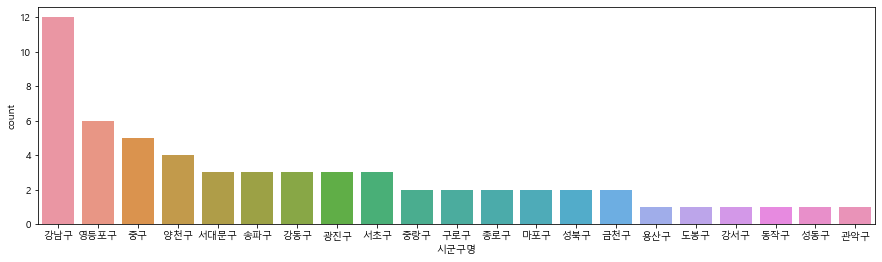

In [76]:
plt.figure(figsize = (15,4))
sns.countplot(data = df_seoul_hospital, x = "시군구명", order = df_seoul_hospital["시군구명"].value_counts().index)

In [78]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '서울보훈병원', '백산의료재단친구병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '명곡안연구소',
       '아산재단금강병원', '아산재단서울중앙병원', '메디힐특수여객', '성광의료재단차병원', '성베드로병원',
       '삼성생명공익재단삼성서', '한국건강관리협회서울특', '정해복지부설한신메디피아', 'Y&T성모마취과', '성애의료재단',
       '사랑의병원', '한국필의료재단', '영남의료재단', '원진재단부설녹색병원', '인제대학교서울백병원',
       '강남센트럴병원', '성삼의료재단미즈메디병원', '건국대학교병원', '서울적십자병원', '우리들병원', '씨엠충무병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원', '국민병원'], dtype=object)